This notebook documents the process of how we generate images of equations that can be used downstream as a dataset to train an equation detector.  
We use this dataset from: https://www.kaggle.com/datasets/xainano/handwrittenmathsymbols.

In [2]:
import numpy as np
import os, random
from skimage import io 
import matplotlib.pyplot as plt

In [3]:
folder = "data/"

# Step 1: Get random equations

In [11]:
def equation_generator(numbers=2, max_num=100):
    assert numbers > 1, "You need at least two numbers to generate a valid equation"
    # Generate numbers and operator
    generated_eqn = []
    operators = ['+', '-', '*']
    for number in range(numbers):
        gen_num = np.random.randint(max_num)
        generated_eqn.append(str(gen_num))
        operator_ind = np.random.randint(len(operators))
        operator = operators[operator_ind]
        generated_eqn.append(operator)
    # Remove the last operator and turn into string
    generated_eqn = generated_eqn[:-1]
    generated_eqn = ''.join(generated_eqn)
    ans = eval(generated_eqn)
    ans_string = '='+str(ans)
    return generated_eqn+ans_string
eqn = equation_generator(numbers=2, max_num=100)
print(eqn)

18+20=38


# Step 2: Pick an image for each digit in the equation and generate the final image

In [5]:
def random_sample_file(directory):
    #  Randomly selects a file from a directory
    n=0
    random.seed();
    for root, dirs, files in os.walk(directory):
        for name in files:
            n += 1
            if random.uniform(0, n) < 1:
                rfile=os.path.join(root, name)
    return rfile
def generate_eqn_image(folder, eqn):
    eqn_array = []
    # 1. Pick correct file
    for char in eqn:
        if char == "*": char = 'times'
        char_folder = f"{folder}/{char}"
        file = random_sample_file(char_folder) # Randomly sample an image from the directory, each (45X45)
        img = io.imread(file)
        eqn_array.append(img)
    # 2. Concatenate all images together into 1 giant image
    eqn = np.hstack(eqn_array)
    return eqn
generate_eqn_image(folder, eqn)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# Step 3: Generate multiples of this and save in a folder

In [12]:
output_folder = "equation_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

85*76=6460


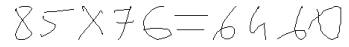

59-74=-15


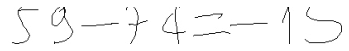

57-21=36


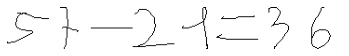

9*50=450


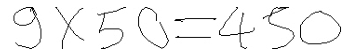

61*29=1769


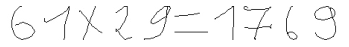

14+92=106


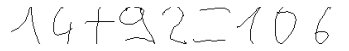

80*61=4880


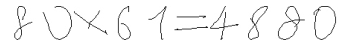

55-86=-31


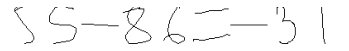

69*75=5175


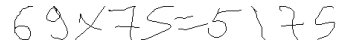

88-30=58


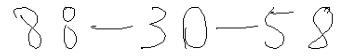

90*60=5400


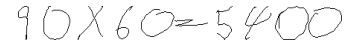

39-6=33


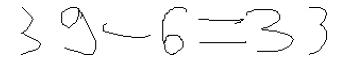

64*64=4096


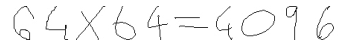

18+43=61


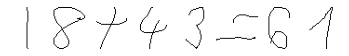

0+58=58


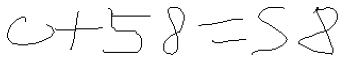

30-47=-17


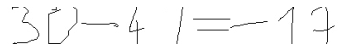

11-79=-68


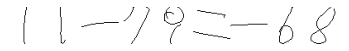

63+64=127


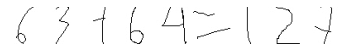

23-90=-67


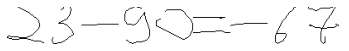

5-39=-34


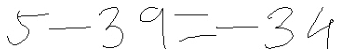

26-33=-7


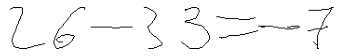

27+75=102


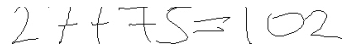

53-33=20


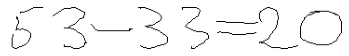

49*43=2107


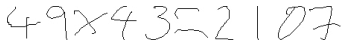

6-30=-24


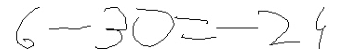

8+57=65


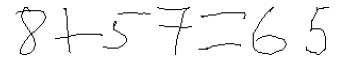

14*91=1274


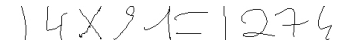

49+46=95


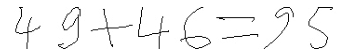

57+98=155


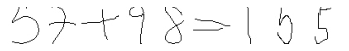

54+69=123


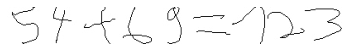

78*17=1326


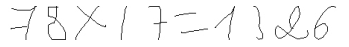

51-21=30


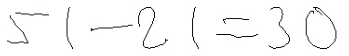

58+11=69


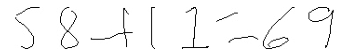

74*43=3182


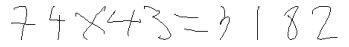

2-50=-48


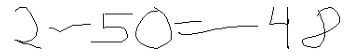

33*33=1089


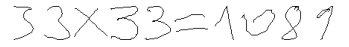

46+86=132


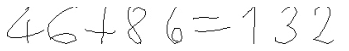

71-69=2


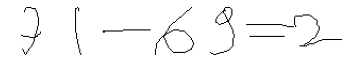

28+13=41


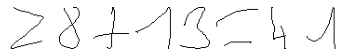

64+36=100


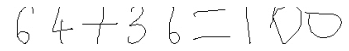

12+10=22


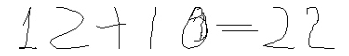

12*14=168


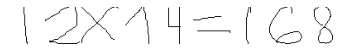

52+22=74


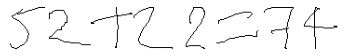

71-71=0


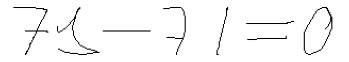

92+79=171


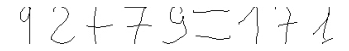

59+87=146


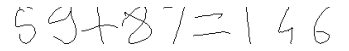

42+73=115


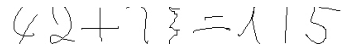

93*47=4371


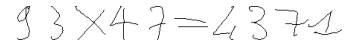

84-61=23


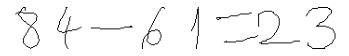

9-65=-56


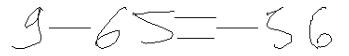

In [13]:
EQNS = 50
NUMBERS = 2 # We generate a set for two numbers
MAX_NUM = 100
SAVE = 1
for i in range(EQNS):
    eqn = equation_generator(numbers=NUMBERS, max_num=MAX_NUM)
    print(eqn)
    eqn_array = generate_eqn_image(folder, eqn)
    filename = f"{NUMBERS}numbers_{str(i).zfill(3)}.png"
    plt.imshow(eqn_array, cmap="gray")
    plt.axis('off')
    plt.savefig(output_folder+"/"+filename)
    plt.show()

86-57*65=-3619


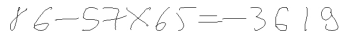

60-38*57=-2106


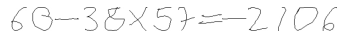

63-26*85=-2147


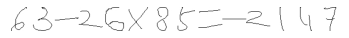

64+14+97=175


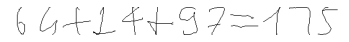

52-77-26=-51


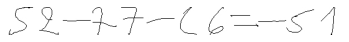

50+93*63=5909


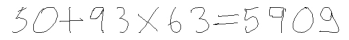

91-4-0=87


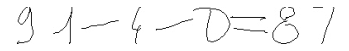

19+15*32=499


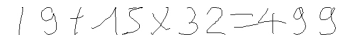

92-81*43=-3391


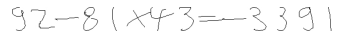

25+88+4=117


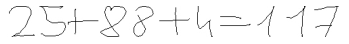

88-35-95=-42


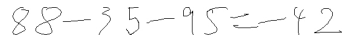

43+42-18=67


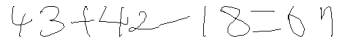

20*46+56=976


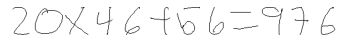

26*37*55=52910


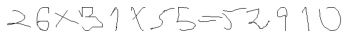

46+22-96=-28


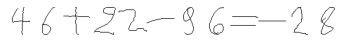

61*1*33=2013


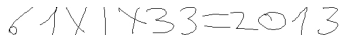

34*62*43=90644


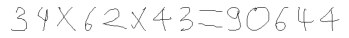

82-73+49=58


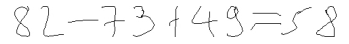

77+82+15=174


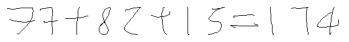

26+94*96=9050


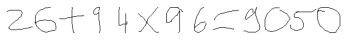

55*28-41=1499


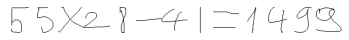

89-58+94=125


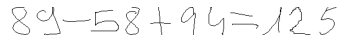

36-79-31=-74


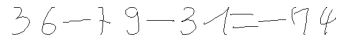

10+90+52=152


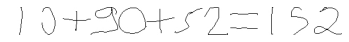

49*29*39=55419


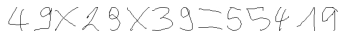

96+26-85=37


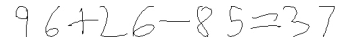

7*10-27=43


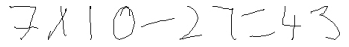

1*35-46=-11


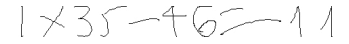

81*96*90=699840


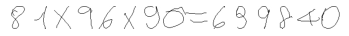

5*35-11=164


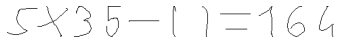

22*48+39=1095


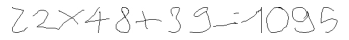

32-1-26=5


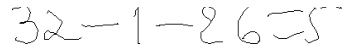

74*53*59=231398


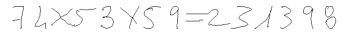

8-22+17=3


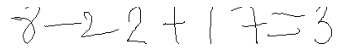

74+26*42=1166


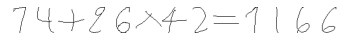

99*20*95=188100


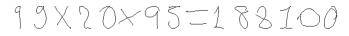

94-90*23=-1976


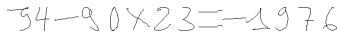

9+67+17=93


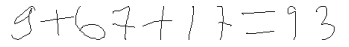

8-29*29=-833


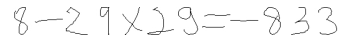

38+53+34=125


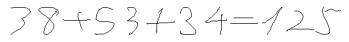

34-80*33=-2606


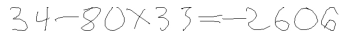

73*12-15=861


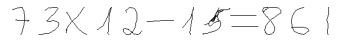

56*5-25=255


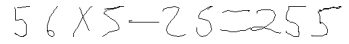

20+39+92=151


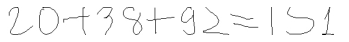

9+44-75=-22


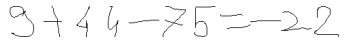

73+56-61=68


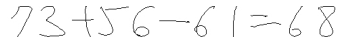

3+1*5=8


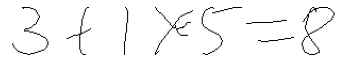

7+47+22=76


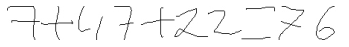

69+97*51=5016


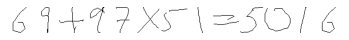

64+4+99=167


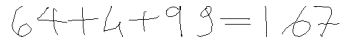

In [8]:
EQNS = 50
NUMBERS = 3 # We generate a set for two numbers
MAX_NUM = 100
SAVE = 1
for i in range(EQNS):
    eqn = equation_generator(numbers=NUMBERS, max_num=MAX_NUM)
    print(eqn)
    eqn_array = generate_eqn_image(folder, eqn)
    filename = f"{NUMBERS}numbers_{str(i).zfill(3)}.png"
    plt.imshow(eqn_array, cmap="gray")
    plt.axis('off')
    plt.savefig(output_folder+"/"+filename)
    plt.show()